# DIABETES PREDICTION 
#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

#### Reading CSV File

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
print('Shape Of The Data: ', df.shape)
print('Positive Classes: ', len(df[df['Class'] == 'tested_positive']))
print('Negative Classes: ', len(df[df['Class'] == 'tested_negative']))

Shape Of The Data:  (768, 9)
Positive Classes:  268
Negative Classes:  500


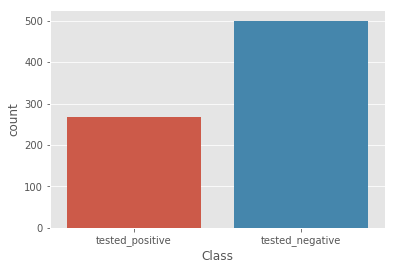

In [4]:
sns.countplot(df['Class'],label="Count")

#### Distribution Plots

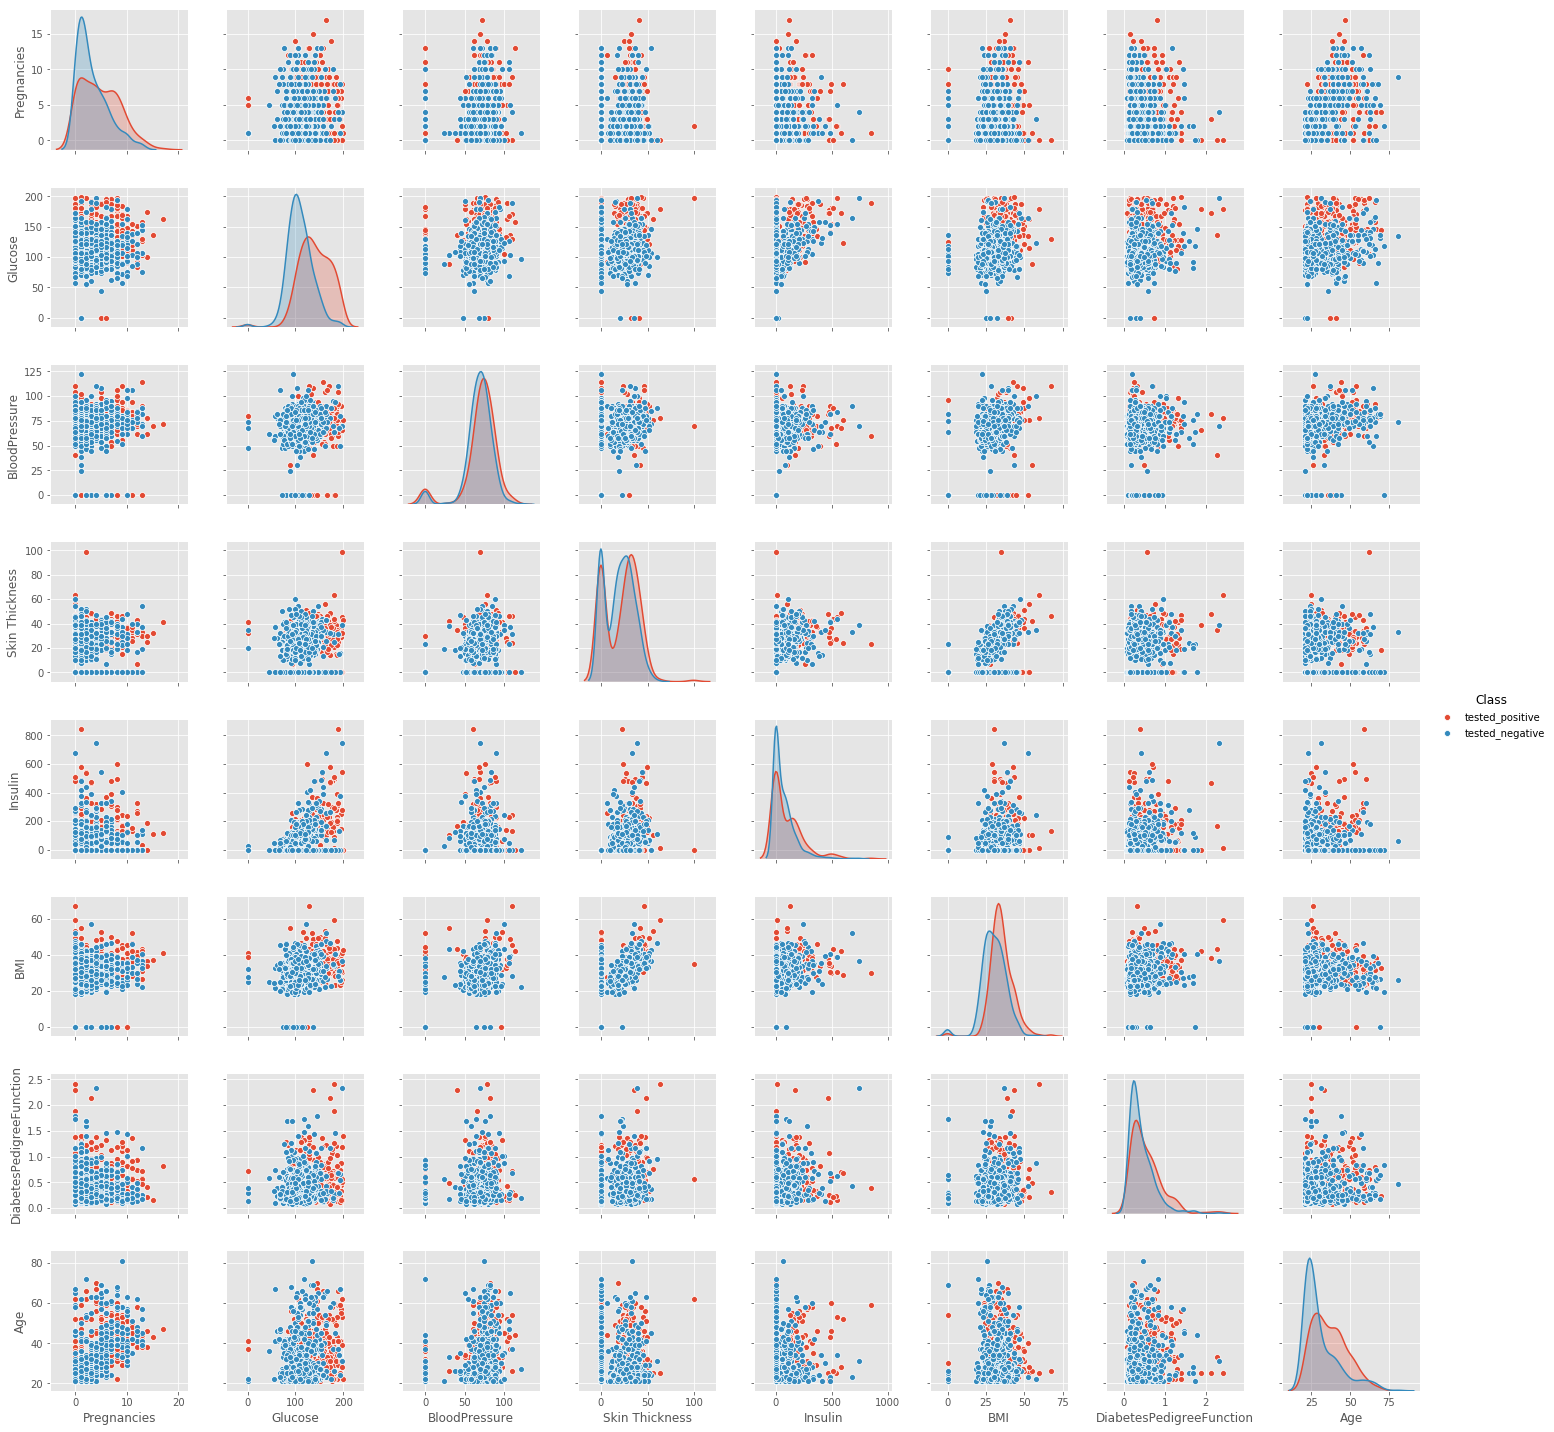

In [5]:
sns.pairplot(df,hue = 'Class',diag_kind = 'kde')

#### Convert Positive And Negative To 1s And 0s For Analysis

In [6]:
Categorical_to_Numeric = {'Class':     {'tested_positive': 1, 'tested_negative': 0}}
df.replace(Categorical_to_Numeric, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Skin Thickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

### Removing 0 Values

In [8]:
c = 0
index_list = []
for i in range(len(df)):
    if (df.iloc[i]['Glucose'] == 0) or (df.iloc[i]['BloodPressure'] == 0) or(df.iloc[i]['BMI'] == 0) or(df.iloc[i]['Insulin'] == 0) or (df.iloc[i]['Skin Thickness'] == 0):
        index_list.append(i)
        c+=1
len(index_list)

376

In [9]:
new_df = df.drop(index_list)

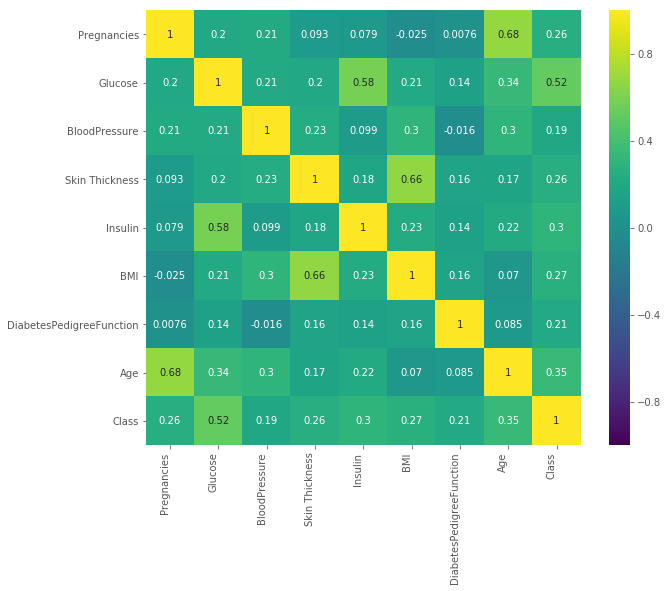

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(
    corr,
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap= 'viridis',
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [11]:
new_df.groupby('Class').mean()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Class,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


#### Checking For Null Values

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

#### Describe Data

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df[df['Class'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [15]:
df[df['Class'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [16]:
df.groupby('Class').mean()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
df.groupby('Class').median()

,Pregnancies,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Class,,,,,,,,
0,2,107,70,21,39,30.05,0.336,27
1,4,140,74,27,0,34.25,0.449,36


**So a fasting insulin level should never be 0, which it might be in a person with untreated Type 1. It shouldn't go below 3. But a high insulin level is just as problematic. A high insulin level is a sign of insulin resistance or prediabetes.**

#### Correlation Matrix In Form Of Heat Map

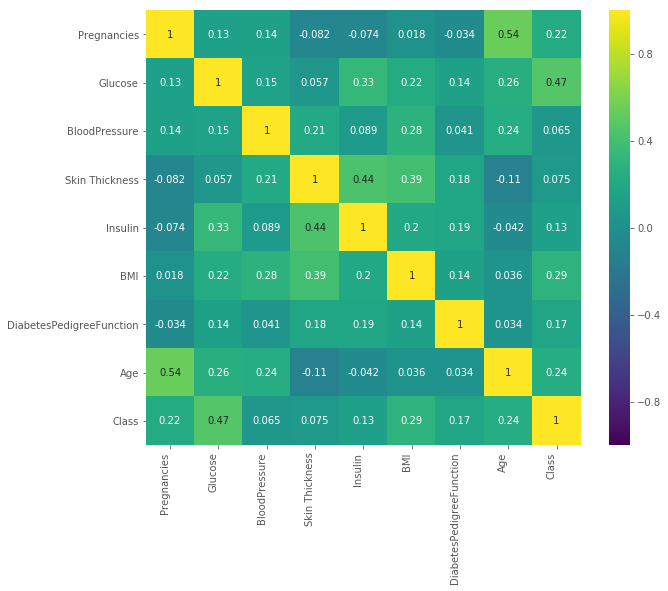

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(
    corr,
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap= 'viridis',
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

**Highly Correlated**  
Age - Pregnancies  
Diabetes - Glucose  
Skin thickness - Insulin  
Skin thickness - BMI   
Glucose - Insulin  

Things I noticed:  
1. Glucose and Diabetes are correlated, Glucose and Insulin are correlated
But Diabetes and Insulin aren't correlated much only 0.13

2. BMI and Diabetes are correlated, BMI and Skin thickness are correlated
But Diabetes and Skin thickness aren't correlated much only 0.075

In [19]:
display(df.corr()[['Class']])

,Class
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
Skin Thickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Class,1.000000


#### Box PLots

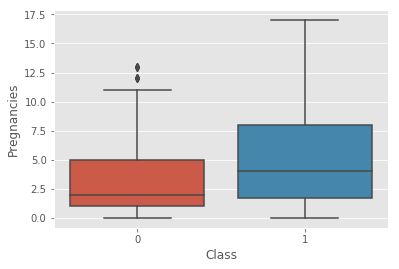

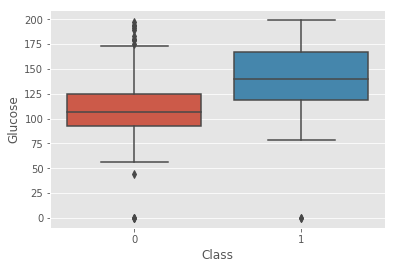

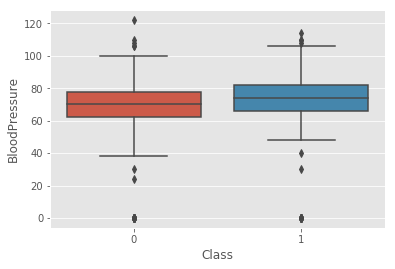

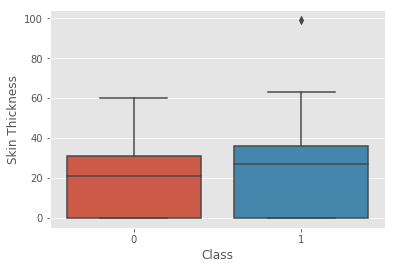

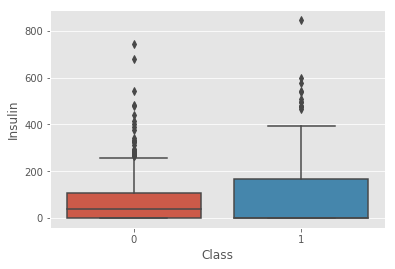

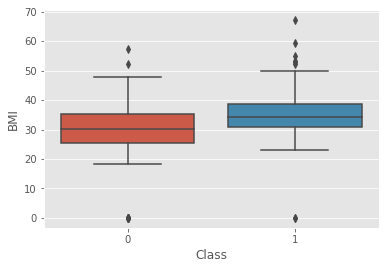

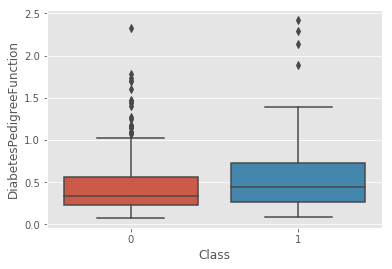

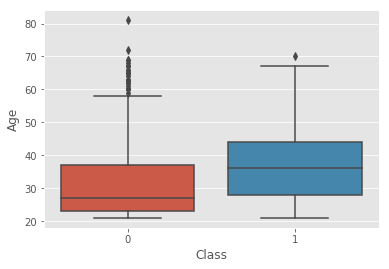

In [20]:
for each in df.columns[:-1]:
    fig, ax  = plt.subplots()
    sns.boxplot(x = "Class", y = each , data = df)

#### For Positive Class

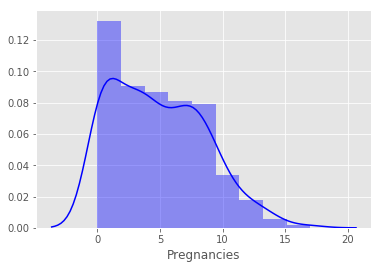

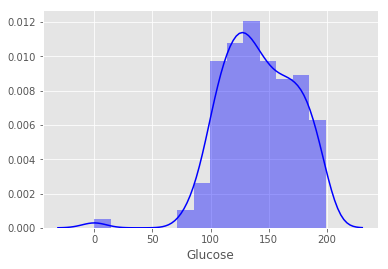

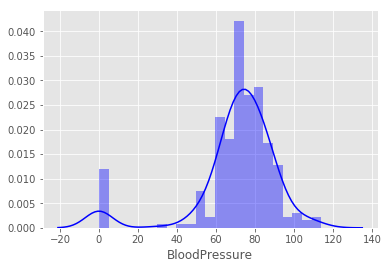

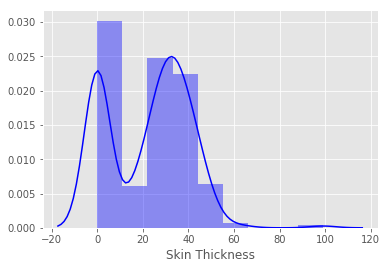

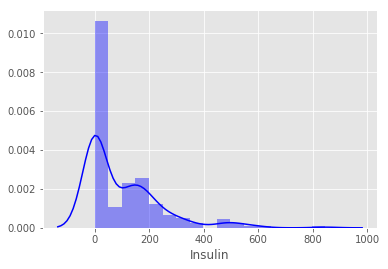

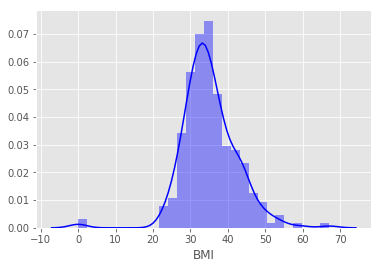

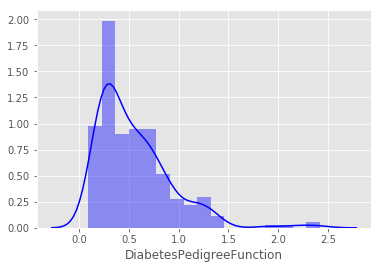

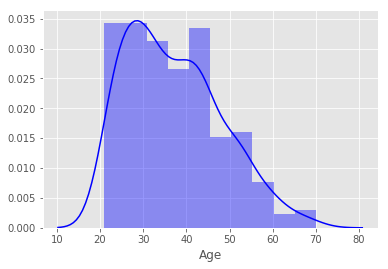

In [21]:
for each in df.columns[:-1]:
    fig, ax  = plt.subplots()
    pdf = df[df['Class']== 1]
    sns.distplot(pdf[each], color="b")

#### For Negative Class

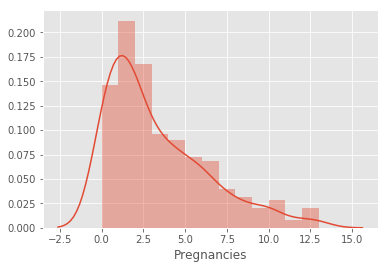

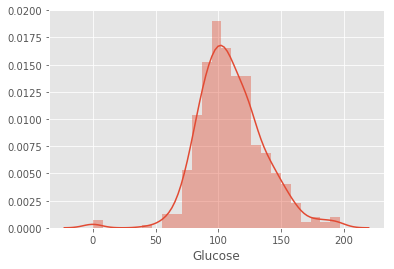

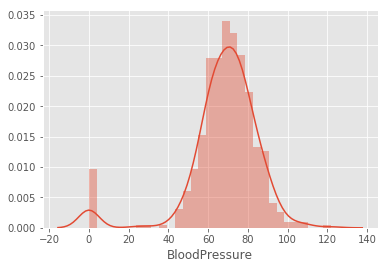

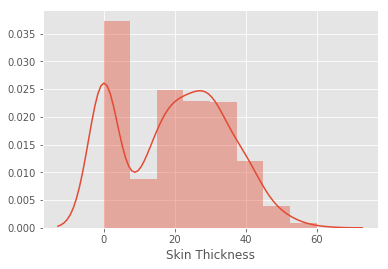

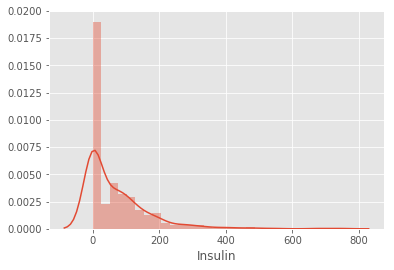

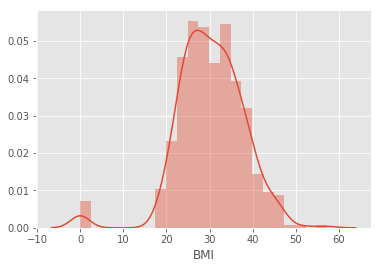

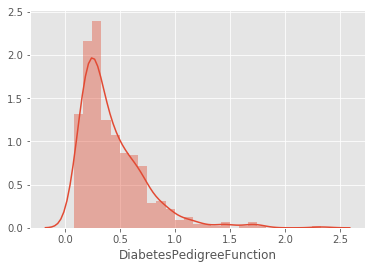

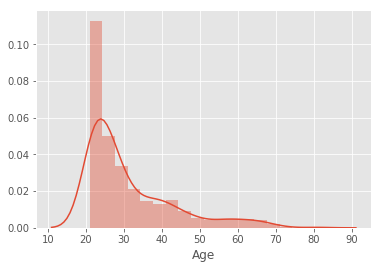

In [22]:
for each in df.columns[:-1]:
    fig, ax  = plt.subplots()
    ndf = df[df['Class']== 0]
    sns.distplot(ndf[each])

### Clustering Analysis
#### K-Means Clustering

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from matplotlib import colors as mcolors
from sklearn.decomposition import PCA

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

In [24]:
X = df[df.columns[:-1]].values
print(X.shape)

(768, 8)


1 : 11615812.918327227
2 : 5142376.455984383
3 : 2913322.58008178
4 : 2150903.356596103
5 : 1736866.8922289023
6 : 1466715.7547550513
7 : 1301608.5282948157
8 : 1143311.358762527
9 : 1001679.0317468981


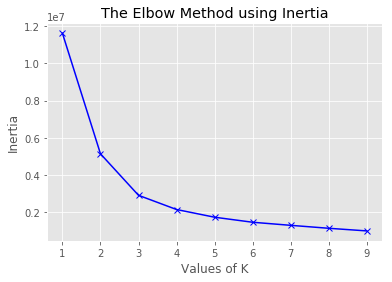

In [25]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 


for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit_transform(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                'euclidean'),axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_) 
    mapping2[k] = kmeanModel.inertia_


for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))


plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [26]:
X = MinMaxScaler().fit_transform(X)
pca = PCA(3) 
pca.fit(X) 
  
pca_data = pd.DataFrame(pca.transform(X)) 
pca_data.head()

,0,1,2
0,0.304955,0.090382,-0.020112
1,-0.193298,-0.072952,0.127663
2,0.218108,-0.127575,-0.267315
3,-0.298826,-0.057153,0.106211
4,-0.169495,0.382749,-0.313636


In [27]:
clusters = 2
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
cluster_colors = ('blue', 'red', 'green', 'yellow', 'orange', 'cyan', 'purple', 'grey','brown', 'seashell')

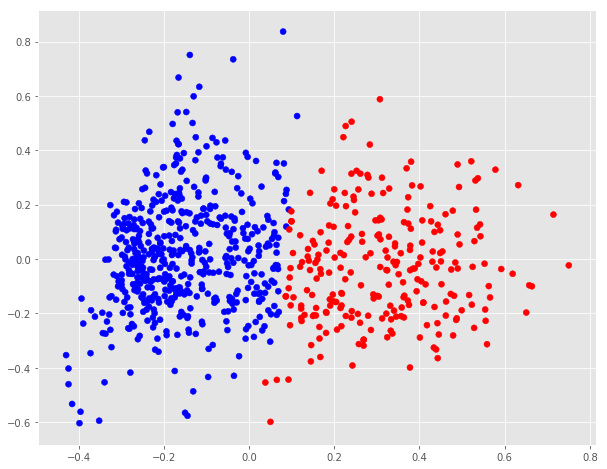

In [29]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(111) # , projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], # pca_data[2], 
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_)))

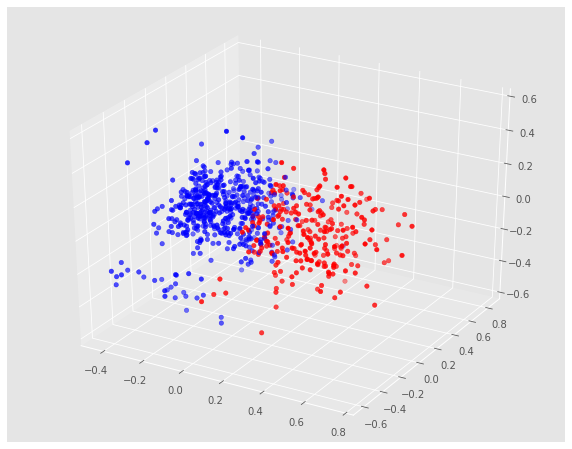

In [30]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(111 , projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2], 
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_)))

In [33]:
def confusionMatrix(Y_Pred, Y_Test):
    df_confusion = pd.crosstab(Y_Pred, Y_Test, margins=True)
    display(df_confusion)
    return df_confusion

g = np.where(kmeans.labels_>0,1,0)
KC = confusionMatrix(pd.Series(g, name = 'Predicted'),df['Class']) 

Class,0,1,All
Predicted,,,
0,380,135,515
1,120,133,253
All,500,268,768


In [34]:
Y_Test = df['Class']
Y_hat = pd.Series(g, name = 'Predicted')
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  11.468078036971155
Jaccard Score:  0.66796875


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [35]:
classes = list(df['Class'].unique())
classes

[1, 0]

In [36]:
def evaluationReport(df_conf):
    print('EVALUATION REPORT \n')
    print('-----------------')
    df_c = df_conf.iloc[:-1,:-1]
    TP, FP, FN, TN, P, R, F, A = [], [], [], [], [], [], [], []
    for i, c in enumerate(classes):
        TP.append(df_c.iloc[i][i])
        FP.append(sum(df_c.iloc[i,:]) - TP[-1])
        FN.append(sum(df_c.iloc[:,i]) - TP[-1])
        TN.append(df_conf.iloc[len(df_conf)-1,len(df_conf)-1] - TP[-1] - FP[-1] - FN[-1])
        A.append((TP[-1]+TN[-1])/(df_conf.iloc[len(df_conf)-1,len(df_conf)-1]))
        P.append( (TP[-1])/(TP[-1] + FP[-1]) )
        R.append( (TP[-1])/(TP[-1] + FN[-1]) )
        F.append( (2*P[-1]*R[-1])/(P[-1]+R[-1]) )
        print('With Respect To: ', c) # .capitalize()) if a sting
        print('\n')
        print('    True Positives : ', TP[-1])
        print('    True Negatives : ', TN[-1])
        print('    False Positives: ', FP[-1])
        print('    False Negatives: ', FN[-1])
        print('    Accuracy       : ', (A[-1]))
        print('    Precision      : ', (P[-1]))
        print('    Recall         : ', (R[-1]))
        print('    F1-Score       : ', (F[-1]))
        print('\n')
    print('-----------------')
    print('Macro Average (Accuracy) : ', sum(A)/float(len(classes)))
    print('Macro Average (Precision): ', sum(P)/float(len(classes)))
    print('Macro Average (Recall)   : ', sum(R)/float(len(classes)))
    print('Macro Average (F1-Score) : ', (sum(F))/float(len(classes)))
    print('\n')
    p = (sum(TP))/(sum(TP)+sum(FP))
    r = (sum(TP))/(sum(TP)+sum(FN))
    print('Micro Average (Accuracy) : ', (sum(TP) + sum(TN))/( sum(TP)+ sum(FN) + sum(FP) + sum(TN)))
    print('Micro Average (Precision): ', (sum(TP))/(sum(TP)+sum(FP)))
    print('Micro Average (Recall)   : ', (sum(TP))/(sum(TP)+sum(FN)))
    print('Micro Average (F1-Score) : ', (2*p*r)/(p+r))
    
evaluationReport(KC)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  380
    True Negatives :  133
    False Positives:  135
    False Negatives:  120
    Accuracy       :  0.66796875
    Precision      :  0.7378640776699029
    Recall         :  0.76
    F1-Score       :  0.7487684729064039


With Respect To:  0


    True Positives :  133
    True Negatives :  380
    False Positives:  120
    False Negatives:  135
    Accuracy       :  0.66796875
    Precision      :  0.525691699604743
    Recall         :  0.4962686567164179
    F1-Score       :  0.510556621880998


-----------------
Macro Average (Accuracy) :  0.66796875
Macro Average (Precision):  0.631777888637323
Macro Average (Recall)   :  0.6281343283582089
Macro Average (F1-Score) :  0.629662547393701


Micro Average (Accuracy) :  0.66796875
Micro Average (Precision):  0.66796875
Micro Average (Recall)   :  0.66796875
Micro Average (F1-Score) :  0.66796875


## Stratified Train Test Split

In [37]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Class'], df['Class'], stratify=df['Class'],test_size = 0.2, random_state=66)

In [39]:
X_Train = x_train.values
Y_Train = y_train.values
X_Test = x_test.values
Y_Test = y_test.values

print(X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape)

(614, 8) (614,) (154, 8) (154,)


## K - Nearest Neighbor

For k-NN, I'd suggest normalizing the data between 0 and 1. k-NN uses the Euclidean distance, as its means of comparing examples. To calculate the distance between two points. In order for all of the features to be of equal importance when calculating the distance, the features must have the same range of values. This is only achievable through normalization. Standardization, on the other hand, does have many useful properties, but can't ensure that the features are mapped to the same range. While standardization may be best suited for other classifiers, this is not the case for k-NN or any other distance-based classifier.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [41]:
X_Train_Scaled = MinMaxScaler().fit(X_Train).transform(X_Train)
X_Test_Scaled = MinMaxScaler().fit(X_Test).transform(X_Test)

In [42]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    knn_clf = KNeighborsClassifier(n_neighbors = n).fit(X_Train_Scaled,Y_Train)
    Y_hat=knn_clf.predict(X_Test_Scaled)
    mean_acc[n-1] = metrics.accuracy_score(Y_Test, Y_hat)
    std_acc[n-1]=np.std(Y_hat==Y_Test)/np.sqrt(Y_hat.shape[0])

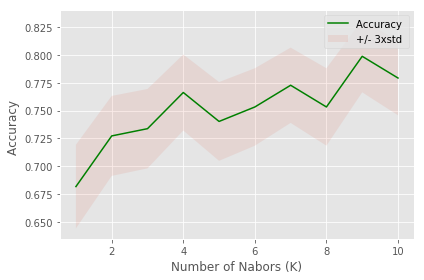

In [43]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [44]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7987012987012987 with k= 9


In [45]:
k = mean_acc.argmax()+1
knn_clf = KNeighborsClassifier(n_neighbors = k).fit(X_Train_Scaled,Y_Train)
Y_hat=knn_clf.predict(X_Test_Scaled)

In [46]:
KNN = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual')) 

Actual,0,1,All
Predicted,,,
0,80,11,91
1,20,43,63
All,100,54,154


In [47]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  6.952714676563864
Jaccard Score:  0.7987012987012987


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [48]:
evaluationReport(KNN)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  80
    True Negatives :  43
    False Positives:  11
    False Negatives:  20
    Accuracy       :  0.7987012987012987
    Precision      :  0.8791208791208791
    Recall         :  0.8
    F1-Score       :  0.837696335078534


With Respect To:  0


    True Positives :  43
    True Negatives :  80
    False Positives:  20
    False Negatives:  11
    Accuracy       :  0.7987012987012987
    Precision      :  0.6825396825396826
    Recall         :  0.7962962962962963
    F1-Score       :  0.735042735042735


-----------------
Macro Average (Accuracy) :  0.7987012987012987
Macro Average (Precision):  0.7808302808302808
Macro Average (Recall)   :  0.7981481481481482
Macro Average (F1-Score) :  0.7863695350606346


Micro Average (Accuracy) :  0.7987012987012987
Micro Average (Precision):  0.7987012987012987
Micro Average (Recall)   :  0.7987012987012987
Micro Average (F1-Score) :  0.7987012987012987


## Decision Trees

https://towardsdatascience.com/the-complete-guide-to-decision-trees-17a874301448  
https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_clf.fit(X_Train,Y_Train)
Y_hat=dt_clf.predict(X_Test)

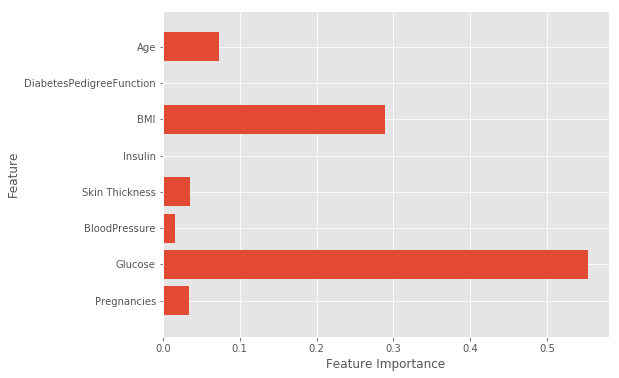

In [51]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns[:-1])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt_clf)

In [52]:
DT = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual')) 

Actual,0,1,All
Predicted,,,
0,77,21,98
1,23,33,56
All,100,54,154


In [53]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  9.868341247512756
Jaccard Score:  0.7142857142857143


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


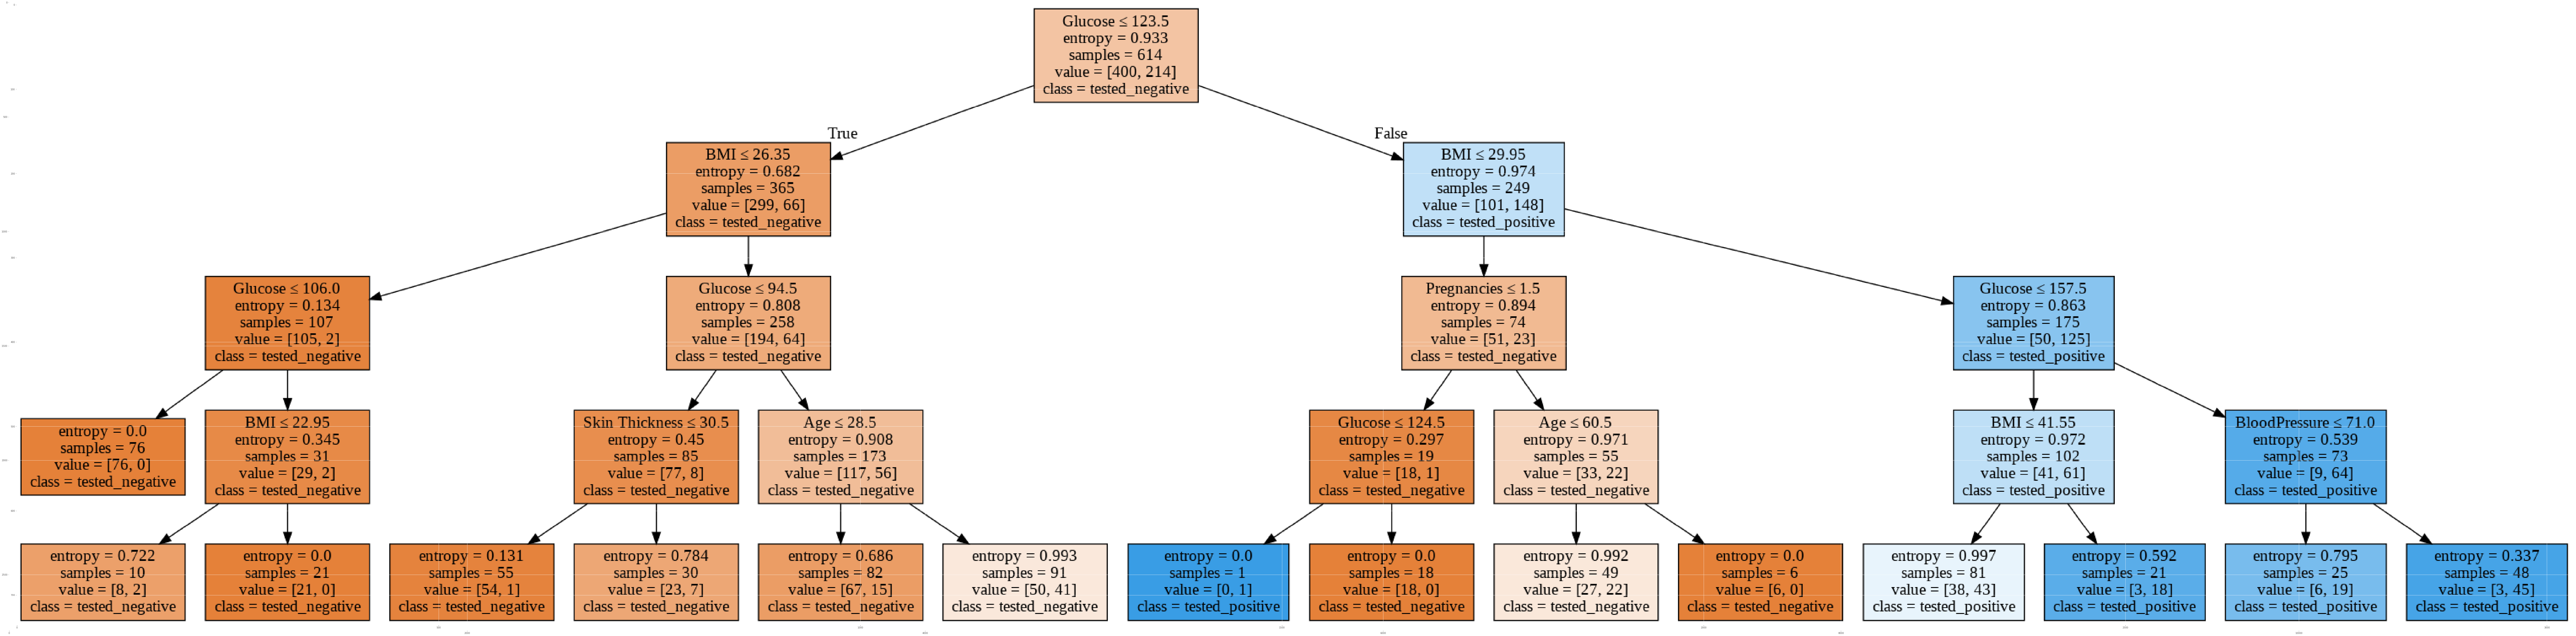

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(200,150))
img = mpimg.imread('DT.png')
plt.imshow(img)

In [55]:
evaluationReport(DT)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  77
    True Negatives :  33
    False Positives:  21
    False Negatives:  23
    Accuracy       :  0.7142857142857143
    Precision      :  0.7857142857142857
    Recall         :  0.77
    F1-Score       :  0.7777777777777778


With Respect To:  0


    True Positives :  33
    True Negatives :  77
    False Positives:  23
    False Negatives:  21
    Accuracy       :  0.7142857142857143
    Precision      :  0.5892857142857143
    Recall         :  0.6111111111111112
    F1-Score       :  0.6


-----------------
Macro Average (Accuracy) :  0.7142857142857143
Macro Average (Precision):  0.6875
Macro Average (Recall)   :  0.6905555555555556
Macro Average (F1-Score) :  0.6888888888888889


Micro Average (Accuracy) :  0.7142857142857143
Micro Average (Precision):  0.7142857142857143
Micro Average (Recall)   :  0.7142857142857143
Micro Average (F1-Score) :  0.7142857142857143


In [ ]:
# - DO IN COLAB
# - Make sure x_train, y_train (Dataframes) are used rather than the numpy values
# - We have kept the class label as strings rather than converting to 1s and 0s 


# from sklearn.externals.six import StringIO
# import pydotplus
# import matplotlib.image as mpimg
# from sklearn import tree

# dot_data = StringIO()
# filename = "Decision_Tree.png"
# featureNames = df.columns[:-1]
# targetNames = df["Class"].unique().tolist()
# out=tree.export_graphviz(dt_clf,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png(filename)
# img = mpimg.imread(filename)
# plt.figure(figsize=(100, 200))
# plt.imshow(img,interpolation='nearest')

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
X_Train_Scaled = StandardScaler().fit(X_Train).transform(X_Train)
X_Test_Scaled = StandardScaler().fit(X_Test).transform(X_Test)

In [58]:
lr_clf = LogisticRegression(C=1, solver='liblinear').fit(X_Train_Scaled,Y_Train)
Y_hat= lr_clf.predict(X_Test_Scaled)

In [59]:
LR = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

Actual,0,1,All
Predicted,,,
0,91,24,115
1,9,30,39
All,100,54,154


In [60]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  7.401213100057951
Jaccard Score:  0.7857142857142857


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [61]:
evaluationReport(LR)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  91
    True Negatives :  30
    False Positives:  24
    False Negatives:  9
    Accuracy       :  0.7857142857142857
    Precision      :  0.7913043478260869
    Recall         :  0.91
    F1-Score       :  0.8465116279069768


With Respect To:  0


    True Positives :  30
    True Negatives :  91
    False Positives:  9
    False Negatives:  24
    Accuracy       :  0.7857142857142857
    Precision      :  0.7692307692307693
    Recall         :  0.5555555555555556
    F1-Score       :  0.6451612903225806


-----------------
Macro Average (Accuracy) :  0.7857142857142857
Macro Average (Precision):  0.7802675585284281
Macro Average (Recall)   :  0.7327777777777778
Macro Average (F1-Score) :  0.7458364591147787


Micro Average (Accuracy) :  0.7857142857142857
Micro Average (Precision):  0.7857142857142857
Micro Average (Recall)   :  0.7857142857142857
Micro Average (F1-Score) :  0.7857142857142857


#### We wont be using using Naive Bayes Classifier, The Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability

## Random Forrest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_clf = RandomForestClassifier(n_estimators=200, bootstrap = True, max_features = 'sqrt')
rf_clf.fit(X_Train, Y_Train)
Y_hat=rf_clf.predict(X_Test)

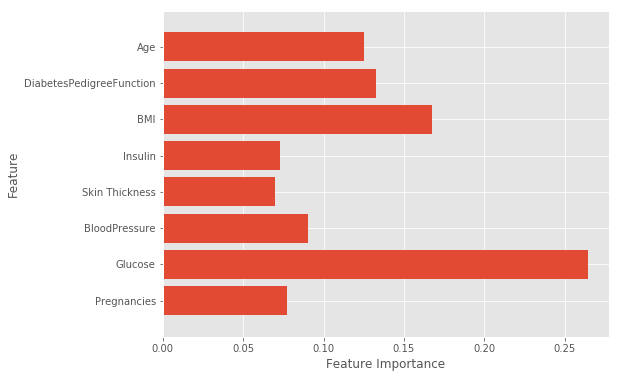

In [64]:
plot_feature_importances_diabetes(rf_clf)

In [65]:
RF = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

Actual,0,1,All
Predicted,,,
0,83,16,99
1,17,38,55
All,100,54,154


In [66]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  7.401254637586792
Jaccard Score:  0.7857142857142857


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [67]:
evaluationReport(RF)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  83
    True Negatives :  38
    False Positives:  16
    False Negatives:  17
    Accuracy       :  0.7857142857142857
    Precision      :  0.8383838383838383
    Recall         :  0.83
    F1-Score       :  0.8341708542713568


With Respect To:  0


    True Positives :  38
    True Negatives :  83
    False Positives:  17
    False Negatives:  16
    Accuracy       :  0.7857142857142857
    Precision      :  0.6909090909090909
    Recall         :  0.7037037037037037
    F1-Score       :  0.6972477064220184


-----------------
Macro Average (Accuracy) :  0.7857142857142857
Macro Average (Precision):  0.7646464646464646
Macro Average (Recall)   :  0.7668518518518519
Macro Average (F1-Score) :  0.7657092803466876


Micro Average (Accuracy) :  0.7857142857142857
Micro Average (Precision):  0.7857142857142857
Micro Average (Recall)   :  0.7857142857142857
Micro Average (F1-Score) :  0.7857142857142857


## Support Vector Machines

In [68]:
from sklearn import svm

In [69]:
svm1_clf = svm.SVC(kernel='rbf')
svm1_clf.fit(X_Train_Scaled, Y_Train) 
Y_hat =  svm1_clf.predict(X_Test_Scaled)

In [70]:
SVM = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

Actual,0,1,All
Predicted,,,
0,93,25,118
1,7,29,36
All,100,54,154


In [71]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  7.1769249468776195
Jaccard Score:  0.7922077922077922


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [72]:
evaluationReport(SVM)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  93
    True Negatives :  29
    False Positives:  25
    False Negatives:  7
    Accuracy       :  0.7922077922077922
    Precision      :  0.788135593220339
    Recall         :  0.93
    F1-Score       :  0.8532110091743119


With Respect To:  0


    True Positives :  29
    True Negatives :  93
    False Positives:  7
    False Negatives:  25
    Accuracy       :  0.7922077922077922
    Precision      :  0.8055555555555556
    Recall         :  0.5370370370370371
    F1-Score       :  0.6444444444444446


-----------------
Macro Average (Accuracy) :  0.7922077922077922
Macro Average (Precision):  0.7968455743879472
Macro Average (Recall)   :  0.7335185185185186
Macro Average (F1-Score) :  0.7488277268093783


Micro Average (Accuracy) :  0.7922077922077922
Micro Average (Precision):  0.7922077922077922
Micro Average (Recall)   :  0.7922077922077922
Micro Average (F1-Score) :  0.7922077922077922


In [ ]:
# svm1_clf = svm.SVC(kernel='linear')
# svm1_clf.fit(X_Train_Scaled, Y_Train) 
# Y_hat =  svm1_clf.predict(X_Test_Scaled)

In [ ]:
# SVM = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

In [ ]:
# svm1_clf = svm.SVC(kernel='sigmoid')
# svm1_clf.fit(X_Train_Scaled, Y_Train) 
# Y_hat =  svm1_clf.predict(X_Test_Scaled)

In [ ]:
# SVM = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

## Multi Layer Perceptron

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
mlp_clf = MLPClassifier(max_iter=1000, alpha=0.1, random_state=42)
mlp_clf.fit(X_Train_Scaled, Y_Train)
Y_hat = mlp_clf.predict(X_Test_Scaled)

In [75]:
MLP = confusionMatrix(pd.Series(Y_hat, name = 'Predicted'),pd.Series(Y_Test, name = 'Actual'))

Actual,0,1,All
Predicted,,,
0,91,20,111
1,9,34,43
All,100,54,154


In [76]:
print('Log Loss: ', log_loss(Y_Test, Y_hat))
print('Jaccard Score: ',jaccard_similarity_score(Y_Test, Y_hat))

Log Loss:  6.504102024865465
Jaccard Score:  0.8116883116883117


C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [77]:
evaluationReport(MLP)

EVALUATION REPORT 

-----------------
With Respect To:  1


    True Positives :  91
    True Negatives :  34
    False Positives:  20
    False Negatives:  9
    Accuracy       :  0.8116883116883117
    Precision      :  0.8198198198198198
    Recall         :  0.91
    F1-Score       :  0.862559241706161


With Respect To:  0


    True Positives :  34
    True Negatives :  91
    False Positives:  9
    False Negatives:  20
    Accuracy       :  0.8116883116883117
    Precision      :  0.7906976744186046
    Recall         :  0.6296296296296297
    F1-Score       :  0.7010309278350516


-----------------
Macro Average (Accuracy) :  0.8116883116883117
Macro Average (Precision):  0.8052587471192122
Macro Average (Recall)   :  0.7698148148148148
Macro Average (F1-Score) :  0.7817950847706063


Micro Average (Accuracy) :  0.8116883116883117
Micro Average (Precision):  0.8116883116883117
Micro Average (Recall)   :  0.8116883116883117
Micro Average (F1-Score) :  0.8116883116883117


In [78]:
# plt.figure(figsize=(20, 5))
# plt.imshow(mlp_clf.coefs_[0], interpolation='none', cmap='viridis')
# plt.yticks(range(8), df.columns[:-1])
# plt.xlabel("Columns in weight matrix")
# plt.ylabel("Input feature")
# plt.colorbar()

Matplotlib Document  
https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html  
Outliers  
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
SMOTE for Imbalanced Classification  
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/  
https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe  
